In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(14)

# Define the number of data points
num_years = 5
num_months = 12
num_points = num_years * num_months

# Generate time values (months)
time = pd.date_range(start='2017-01-01', periods=num_points, freq='M')

# Create a base trend with some noise
trend = np.linspace(50, 150, num_points) + np.random.normal(0, 20, num_points)

# Generate seasonality values
seasonality_first_last = np.random.uniform(0, 0.5, size=4)
seasonality_middle = np.random.uniform(2, 3, size=num_months - 8)
seasonality = np.concatenate((seasonality_first_last, seasonality_middle, seasonality_first_last))

# Repeat the seasonality pattern for each year
seasonality = np.tile(seasonality, num_years)

# Combine trend, seasonality, and noise to get the final data
ice_cream_sales = trend * seasonality + np.random.normal(0, 20, num_points)

# Create a DataFrame to store the data
data = pd.DataFrame({'Date': time, 'IceCreamSales': ice_cream_sales})
data = data.set_index('Date')



In [29]:
from datetime import datetime
# Defining borders for Train/Test
train_end = datetime(2020, 11, 30)
test_start = datetime(2020, 12 , 31)

train_data = data[:train_end]
test_data = data[test_start:]


In [30]:
import statsmodels.api as sm
# Fitting the model
model = sm.tsa.arima.ARIMA(train_data, order=(10,0,0))
fit_model = model.fit()

In [97]:
# Model Summary
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:          IceCreamSales   No. Observations:                   47
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -251.784
Date:                Wed, 06 Sep 2023   AIC                            525.568
Time:                        02:09:51   BIC                            545.919
Sample:                    01-31-2017   HQIC                           533.226
                         - 11-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.5061     12.056      5.931      0.000      47.878      95.134
ar.L1          0.5046      0.227      2.224      0.026       0.060       0.949
ar.L2          0.3061      0.177      1.733      0.0

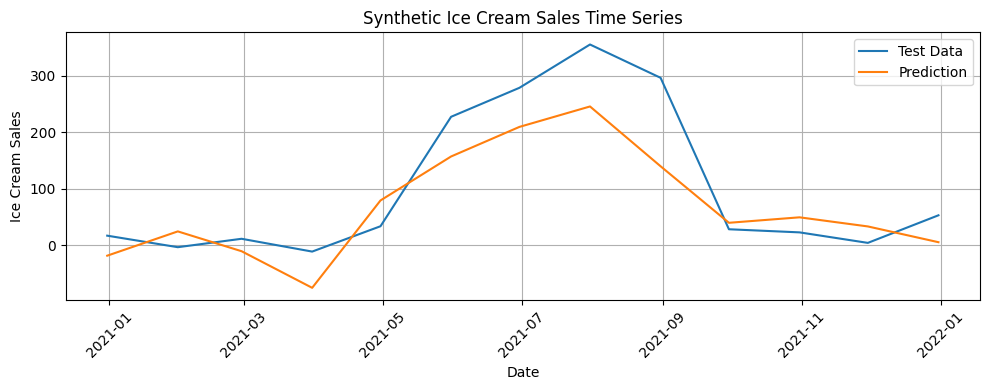

In [12]:
# Getting the predictions and residuals
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = fit_model.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IceCreamSales'] - predictions

#Plotting the resuts
plt.figure(figsize=(10,4))
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='Prediction')
plt.title('Synthetic Ice Cream Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Ice Cream Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

AIC for order (1, 0, 0): 541.7317906312375
AIC for order (2, 0, 0): 541.3888981877146
AIC for order (3, 0, 0): 536.9792316057664
AIC for order (4, 0, 0): 537.5779798103863
AIC for order (5, 0, 0): 539.4160259396505
AIC for order (6, 0, 0): 539.0772311408076
AIC for order (7, 0, 0): 529.3152676251099
AIC for order (8, 0, 0): 530.1695022610177
AIC for order (9, 0, 0): 525.5677637050505


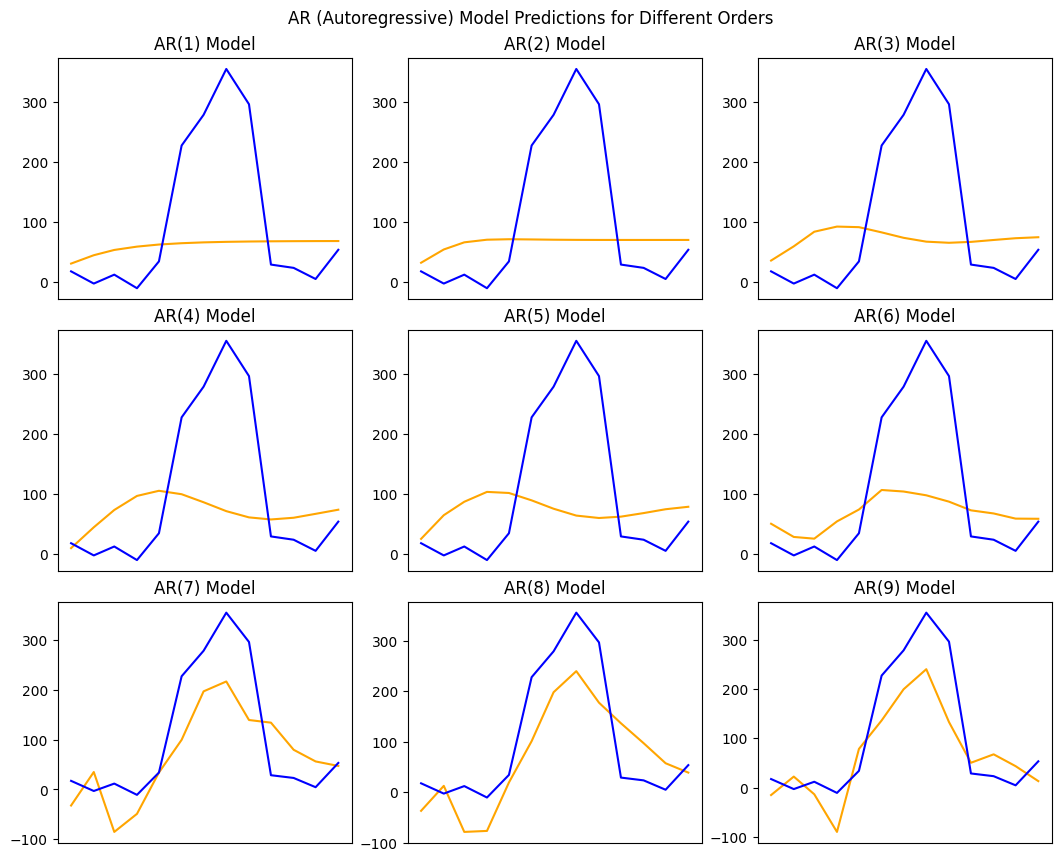

In [92]:
n=0
m=0
q=0
aics = []
rmses = []
orders = list(range(1,10))
# Setting up the figure
fig = plt.figure(figsize=(10.5, 8.5), layout="constrained")
fig.suptitle("AR (Autoregressive) Model Predictions for Different Orders")
spec = fig.add_gridspec(ncols=3, nrows=3)

for p in range(1, 10):
    q = q + 1
        
    # Fit AR model for the current order
    model = sm.tsa.ARIMA(train_data, order=(p, 0, 0))
    fit_model = model.fit()
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    predictions = fit_model.predict(start=pred_start_date, end=pred_end_date)
    residuals = test_data['IceCreamSales'] - predictions
    
    # Getting AIC and RMSE for the current order
    aics.append(fit_model.aic)
    rmses.append(np.sqrt(np.mean(residuals**2)))


    # Create a separate plot for each order
    
    ax = fig.add_subplot(spec[n,m])
    # Plot the predictions
    ax.plot(predictions, color='orange' ,label="Original Data")
    ax.set_title(f'AR({str(q)}) Model')
    ax.set_xticks([])

    # Plot the ARIMA model prediction
    ax.plot(test_data, color='blue', label="Fitted Values")

    
    if m != 2:
        m = m + 1
    else:
        m = 0
        n = n + 1



Text(0, 0.5, 'AIC')

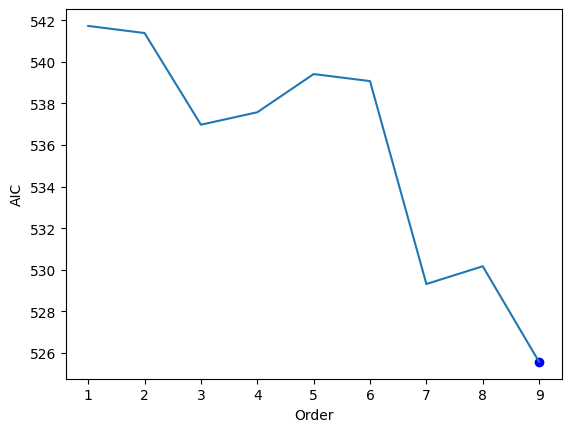

In [93]:
#Getting and plotting the lowest point
l_p_index = aics.index(min(aics))
plt.plot(orders, aics)
plt.scatter(orders[l_p_index], aics[l_p_index], c='blue')
plt.xlabel('Order')
plt.ylabel('AIC')

Text(0, 0.5, 'RMSE')

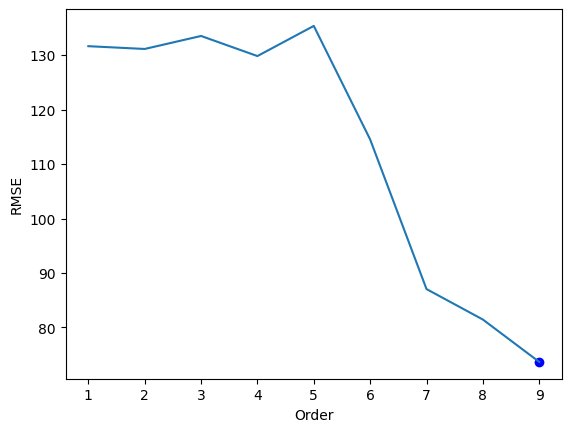

In [96]:
#Getting and plotting the lowest point
l_p_index = rmses.index(min(rmses))
plt.plot(orders, rmses)
plt.scatter(orders[l_p_index], rmses[l_p_index], c='blue')
plt.xlabel('Order')
plt.ylabel('RMSE')